In [1]:
import pandas as pd
import numpy as np

In [7]:
import sys
import datetime as dt

In [3]:
sys.path[0]

'/home/gpanagioto/GitHub/AdvBA/EPF_ABA23'

In [6]:
pd.read_csv(sys.path[0]+"/data/imports/DK_2/Imports.csv")

,Unnamed: 0,DE_AT_LU,DK_1,SE_4
0,2018-01-01 00:00:00+01:00,600.0,585.0,0.0
1,2018-01-01 01:00:00+01:00,600.0,590.0,0.0
2,2018-01-01 02:00:00+01:00,600.0,476.0,0.0
3,2018-01-01 03:00:00+01:00,600.0,538.0,0.0
4,2018-01-01 04:00:00+01:00,600.0,520.0,0.0
...,...,...,...,...
1411,2018-02-28 19:00:00+01:00,600.0,591.0,0.0
1412,2018-02-28 20:00:00+01:00,600.0,590.0,0.0
1413,2018-02-28 21:00:00+01:00,600.0,590.0,0.0
1414,2018-02-28 22:00:00+01:00,600.0,590.0,0.0


In [16]:
now = dt.datetime.now().date()

In [18]:
dt.datetime.now().date().strftime("%Y%m%d")

'20230415'

# Imports

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
#import xgboost as xg
from entsoe import EntsoePandasClient
from statsmodels.graphics import tsaplots

# Entsoe

## API setup

In [2]:
client = EntsoePandasClient(api_key = '5904b3c4-7835-4b64-a741-480681944340')

# period
start = pd.Timestamp('20180101', tz = 'Europe/Copenhagen')
end = pd.Timestamp('20230331', tz = 'Europe/Copenhagen')

# countries
country_code = 'DK_2' # Denmark (Copenhagen)
country_code_from = 'DE_LU' # Germany - Luxemburg
country_code_to = 'DK_2' # East Denmark

## Queries

Day Ahead

In [3]:
# day-ahead prices
day_ahead_prices_series = client.query_day_ahead_prices(country_code, start = start, end = end)

In [4]:
day_ahead_prices = pd.DataFrame({'Day-ahead prices':day_ahead_prices_series})
day_ahead_prices # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Day-ahead prices
2018-01-01 00:00:00+01:00,26.33
2018-01-01 01:00:00+01:00,26.43
2018-01-01 02:00:00+01:00,26.10
2018-01-01 03:00:00+01:00,24.70
2018-01-01 04:00:00+01:00,24.74
...,...
2023-03-30 20:00:00+02:00,116.50
2023-03-30 21:00:00+02:00,100.80
2023-03-30 22:00:00+02:00,80.77
2023-03-30 23:00:00+02:00,60.03


Load and Load Forecast

In [5]:
# Actual load and load forecast
load_and_forecast = client.query_load_and_forecast(country_code, start = start, end = end)

In [6]:
load_and_forecast # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Forecasted Load,Actual Load
2018-01-01 00:00:00+01:00,1591.0,1607.0
2018-01-01 01:00:00+01:00,1541.0,1566.0
2018-01-01 02:00:00+01:00,1497.0,1460.0
2018-01-01 03:00:00+01:00,1426.0,1424.0
2018-01-01 04:00:00+01:00,1378.0,1380.0
...,...,...
2023-03-30 19:00:00+02:00,1794.0,1766.0
2023-03-30 20:00:00+02:00,1704.0,1698.0
2023-03-30 21:00:00+02:00,1607.0,1601.0
2023-03-30 22:00:00+02:00,1522.0,1486.0


Solar and Wind generation Forecast

In [34]:
# Solar and wind forecast generation
wind_solar_forecast = client.query_wind_and_solar_forecast(country_code, start = start, end = end, psr_type=None)

In [ ]:
wind_solar_forecast.tail()

#### Imports

In [17]:
imports =  client.query_import(country_code, start, end)

In [18]:
imports

,DE_AT_LU,DE_LU,DK_1,SE_4
2018-01-01 00:00:00+01:00,600.0,NaN,585.0,0.0
2018-01-01 01:00:00+01:00,600.0,NaN,590.0,0.0
2018-01-01 02:00:00+01:00,600.0,NaN,476.0,0.0
2018-01-01 03:00:00+01:00,600.0,NaN,538.0,0.0
2018-01-01 04:00:00+01:00,600.0,NaN,520.0,0.0
...,...,...,...,...
2023-03-30 22:45:00+02:00,NaN,0.0,NaN,NaN
2023-03-30 23:00:00+02:00,NaN,0.0,0.0,660.0
2023-03-30 23:15:00+02:00,NaN,0.0,NaN,NaN
2023-03-30 23:30:00+02:00,NaN,0.0,NaN,NaN


#### Exports

In [32]:
exports1 =  client.query_crossborder_flows(country_code, 'DE_LU', start = start, end = end)
exports2 =  client.query_crossborder_flows(country_code, 'DK_1', start = start, end = end)
exports3 =  client.query_crossborder_flows(country_code, 'SE_4', start = start, end = end)

In [27]:
exportsDLA = client.query_crossborder_flows(country_code, 'DE_AT_LU', start = start, end = end)

In [28]:
exports1
exports2
exports3
exportsDLA

2018-01-01 00:00:00+01:00      0.0
2018-01-01 01:00:00+01:00      0.0
2018-01-01 02:00:00+01:00      0.0
2018-01-01 03:00:00+01:00      0.0
2018-01-01 04:00:00+01:00      0.0
                             ...  
2018-09-30 19:00:00+02:00    241.0
2018-09-30 20:00:00+02:00    270.0
2018-09-30 21:00:00+02:00    496.0
2018-09-30 22:00:00+02:00    581.0
2018-09-30 23:00:00+02:00    527.0
Freq: 60T, Length: 6551, dtype: float64

In [33]:
exports1

2018-10-01 00:00:00+02:00    365.0
2018-10-01 01:00:00+02:00    538.0
2018-10-01 02:00:00+02:00    550.0
2018-10-01 03:00:00+02:00    584.0
2018-10-01 04:00:00+02:00    585.0
                             ...  
2023-03-30 22:45:00+02:00    627.0
2023-03-30 23:00:00+02:00    639.0
2023-03-30 23:15:00+02:00    638.0
2023-03-30 23:30:00+02:00    640.0
2023-03-30 23:45:00+02:00    642.0
Length: 83106, dtype: float64

In [12]:
imports.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89657 entries, 2018-01-01 00:00:00+01:00 to 2023-03-30 23:45:00+02:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DE_AT_LU  6551 non-null   float64
 1   DE_LU     83106 non-null  float64
 2   DK_1      45958 non-null  float64
 3   SE_4      45959 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB


### Wind Solar Forecast

In [13]:
wind_solar_forecast # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Solar,Wind Offshore,Wind Onshore
2018-01-01 00:00:00+01:00,0.0,245.0,339.0
2018-01-01 01:00:00+01:00,0.0,264.0,347.0
2018-01-01 02:00:00+01:00,0.0,291.0,356.0
2018-01-01 03:00:00+01:00,0.0,300.0,363.0
2018-01-01 04:00:00+01:00,0.0,336.0,385.0
...,...,...,...
2023-03-30 19:00:00+02:00,2.0,666.0,324.0
2023-03-30 20:00:00+02:00,0.0,749.0,334.0
2023-03-30 21:00:00+02:00,0.0,833.0,361.0
2023-03-30 22:00:00+02:00,0.0,833.0,374.0


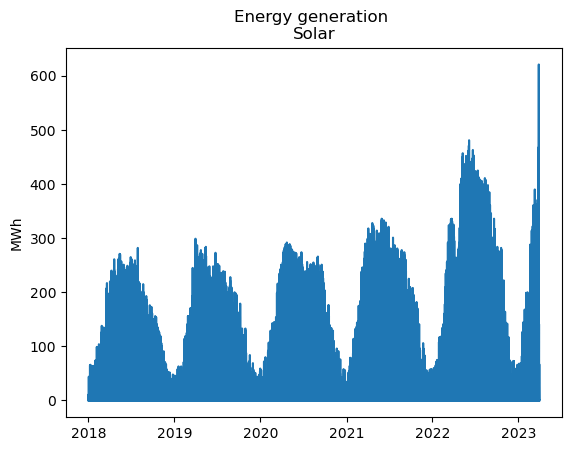

In [14]:
plt.plot(wind_solar_forecast['Solar'])
plt.title('Energy generation \nSolar')
plt.ylabel('MWh')
plt.show()

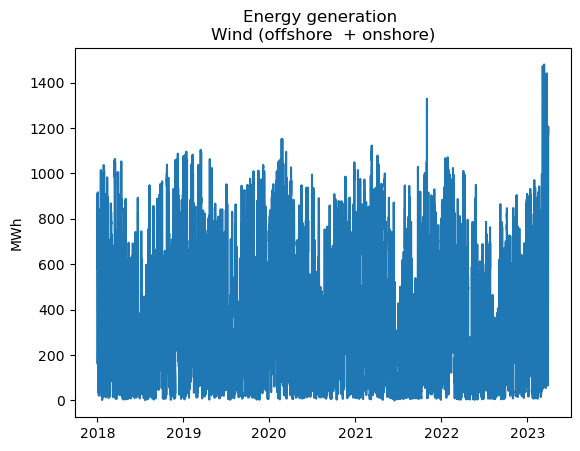

In [15]:
plt.plot(wind_solar_forecast['Wind Onshore']+wind_solar_forecast['Wind Offshore'])
plt.title('Energy generation \nWind (offshore  + onshore)')
plt.ylabel('MWh')
plt.show()

## Saving the data

In [35]:
day_ahead_prices.to_csv('day_ahead_prices.csv')
load_and_forecast.to_csv('load_and_forecast.csv')
wind_solar_forecast.to_csv('wind_solar_forecast.csv')
imports.to_csv('energy_imports.csv')
exports1.to_csv('exportsDELU.csv')
exports2.to_csv('exportsDK1.csv')
exports3.to_csv('exportsSE4.csv')